# Uber Data Analysis
This analysis identifies the root cause of the problem (i.e. cancellation and
non-availability of cars) and recommend ways to improve the situation. As a result of this
analysis, I present to the client the root cause(s) and possible hypotheses
of the problem(s) and recommend ways to improve them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uber_data=pd.read_csv("Uber Request Data.csv")  #exporting data
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [28]:
#cleaning the data
# to check duplicate data and eliminate 

if (len(uber_data["Request id"].unique()) == uber_data.shape[0]):
    print('No Duplicates')
else:
    print((uber_data.shape[0])-(len(uber_data["Request id"].unique())), "Duplicates")
    uber_data.drop_duplicates()

No Duplicates


In [3]:
#to check number of null values present in each column of the data

uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [4]:
#identify data type and covert it to appropriate data type

uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB


In [5]:
# "Request timestamp"and "Drop timestamp" are not in datetime data type
# to convert "Request timestamp"and "Drop timestamp" columns to datetime datatype

uber_data["Request timestamp"]=uber_data["Request timestamp"].astype(str).replace("/","-")        
uber_data["Request timestamp"]=pd.to_datetime(uber_data["Request timestamp"], dayfirst=True)

uber_data["Drop timestamp"]=uber_data["Drop timestamp"].astype(str).replace("/","-")        
uber_data["Drop timestamp"]=pd.to_datetime(uber_data["Drop timestamp"], dayfirst=True)

uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 263.5+ KB


In [6]:
#to add new columns with requested hour and day 

uber_data["request_hr"]=uber_data["Request timestamp"].dt.hour
uber_data["request_day"]=uber_data["Request timestamp"].dt.day
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hr,request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


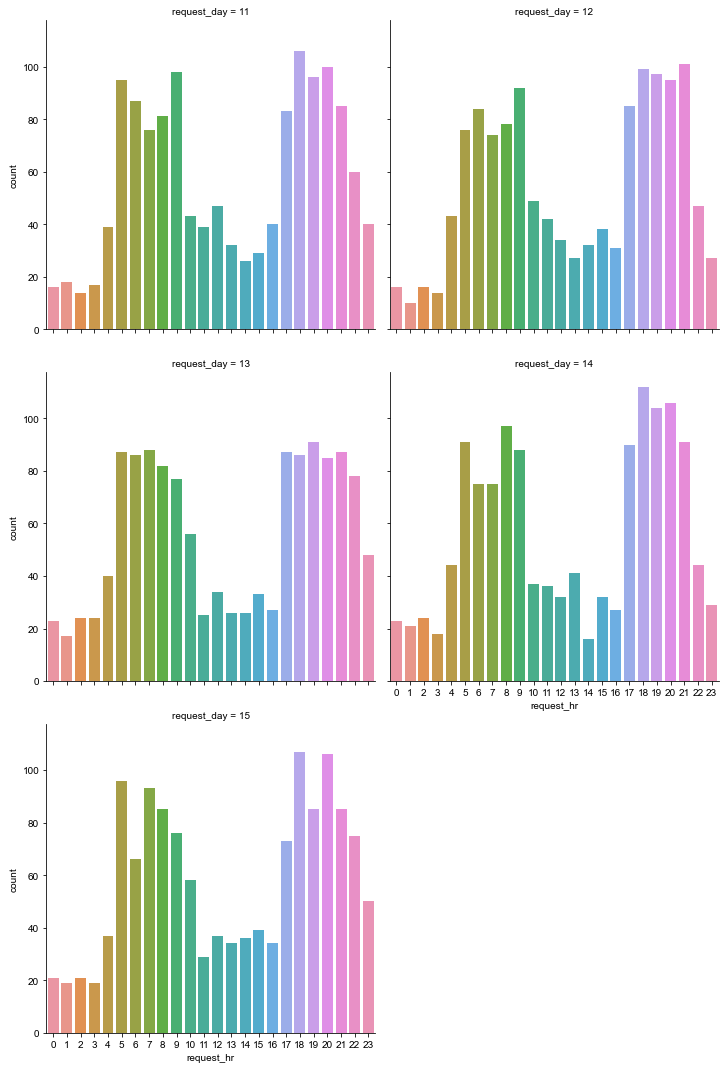

In [7]:
#request count for hour for every day

sns.catplot("request_hr",data=uber_data,kind="count",col="request_day",col_wrap=2)
sns.set_style("darkgrid")
sns.set_palette("RdBu")
plt.show()

<Figure size 720x432 with 0 Axes>

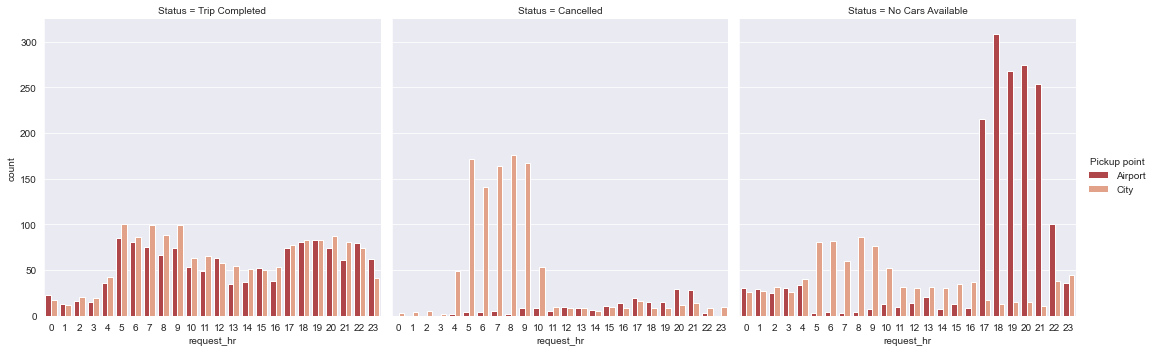

In [8]:
#status of request for every hour from different pickup point 
plt.figure(figsize=(10,6))
sns.catplot("request_hr",data=uber_data,kind="count",hue="Pickup point",col="Status")
sns.set_palette(["green","Yellow","red"])
sns.set_style("white")
plt.show()

In [9]:
#catagorize time slot for further analyse 

uber_data["Time slot"]=0
j=0
for i in uber_data["request_hr"]:
    if uber_data.iloc[j,6] <5:
        uber_data.iloc[j,8]="Pre_morning"
    elif 5<=  uber_data.iloc[j,6] <10:
        uber_data.iloc[j,8]="Morning rush"
    elif 10<=  uber_data.iloc[j,6] <17:
        uber_data.iloc[j,8]="Day time"
    elif 17<=  uber_data.iloc[j,6] <22:
        uber_data.iloc[j,8]="Evening rush"
    else:
        uber_data.iloc[j,8]="Late night"
    j=j+1
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hr,request_day,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late night


In [10]:
#time slot counts 

uber_data["Time slot"].value_counts()

Evening rush    2342
Morning rush    2103
Day time        1224
Pre_morning      578
Late night       498
Name: Time slot, dtype: int64

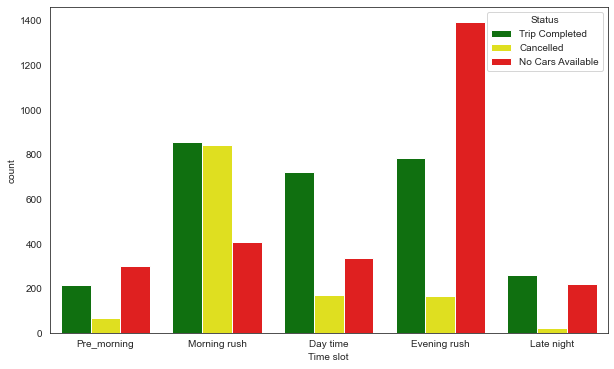

In [11]:
#plot on time slot and counts 
plt.figure(figsize=(10,6))
sns.countplot(x="Time slot",data=uber_data,hue="Status",
              order=("Pre_morning","Morning rush","Day time","Evening rush","Late night"))
plt.show()

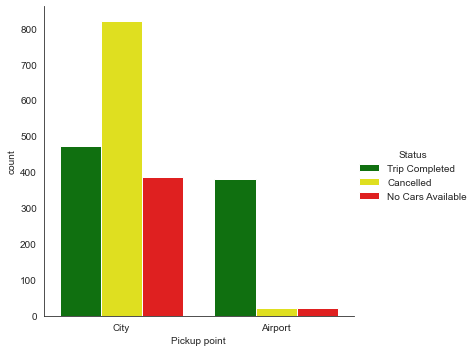

In [12]:
#status count for pickup points for time slot "Morning Rush"

morning_rush= uber_data[uber_data["Time slot"]=="Morning rush"]
sns.catplot(x="Pickup point",data=morning_rush,kind="count",hue="Status")
plt.show()

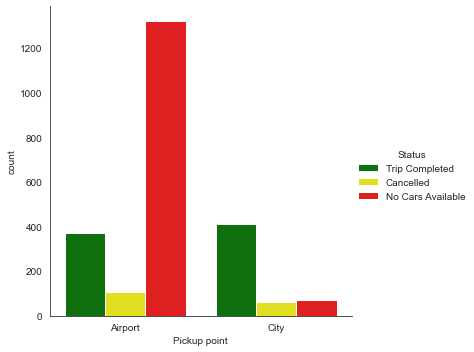

In [13]:
#status count for pickup points for time slot "Morning Rush"

evening_rush= uber_data[uber_data["Time slot"]=="Evening rush"]
sns.catplot(x="Pickup point",data=evening_rush,kind="count",hue="Status")
plt.show()

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [14]:
#cancellation of cab as per the pickup location at morning rush hours

airpot_cancelled_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="Airport") & (morning_rush["Status"]=="Cancelled")].shape[0]
city_cancelled_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="City") & (morning_rush["Status"]=="Cancelled")].shape[0]

#cancellation of cab as per the pickup location at morning rush hours

airpot_cancelled_eve= evening_rush.loc[(evening_rush["Pickup point"]=="Airport") & (evening_rush["Status"]=="Cancelled")].shape[0]
city_cancelled_eve= evening_rush.loc[(evening_rush["Pickup point"]=="City") & (evening_rush["Status"]=="Cancelled")].shape[0]


print("Cancelled Airport trip during  morning rush hours",airpot_cancelled_mrng)
print("Cancelled City trip during morning rush hours    ",city_cancelled_mrng)

print("Cancelled Airport trip during evening rush hours ",airpot_cancelled_eve)
print("Cancelled City trip during evening rush hours    ",city_cancelled_eve)


Cancelled Airport trip during  morning rush hours 23
Cancelled City trip during morning rush hours     820
Cancelled Airport trip during evening rush hours  106
Cancelled City trip during evening rush hours     60


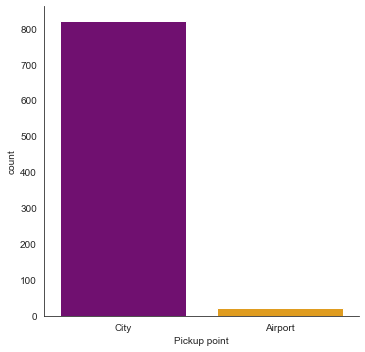

In [29]:
#cancelled trip for pickup points in morning rush

cancelled_trip_mrng= morning_rush.loc[morning_rush["Status"]=="Cancelled"]
sns.catplot(x="Pickup point",data=cancelled_trip_mrng,kind="count")
sns.set_palette(["purple","orange"])
plt.show()

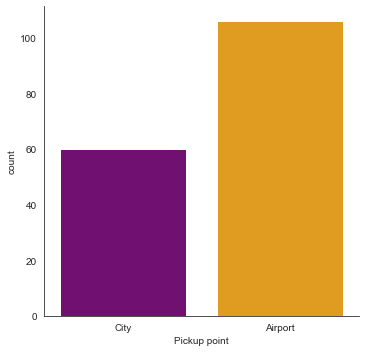

In [30]:
#cancelled trip for pickup points in evening rush

cancelled_trip_eve= evening_rush.loc[evening_rush["Status"]=="Cancelled"]
sns.catplot(x="Pickup point",data=cancelled_trip_eve,kind="count")
plt.show()

##Comapring with both the plot above the cancellation request is high in number from city to airport during morning rush hours and during evening rush hours airport to city has been cancelled more

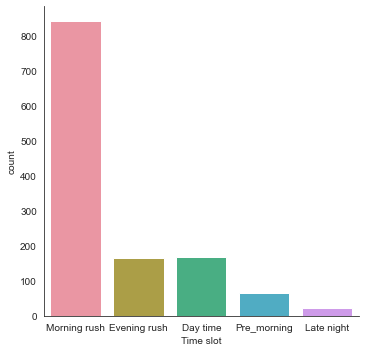

In [31]:
#cancelled trip during time slot

cancelled_trip= uber_data.loc[uber_data['Status']=="Cancelled"] 
sns.catplot(x="Time slot",data=cancelled_trip,kind="count")
plt.show()

# The frequency of requests that get cancelled
From the count plot above, we can see that the request for cancellation is high during morning hours from 5 AM to 10 AM which is peak hours. Evening from 5pm to 10 pm has as many cancel request as day time from 10 AM to 5PM. late night has fewer number of cancallation. 

# Severity problem at each location by looking at availability of cabs in each of the pickup location

In [341]:
#unavailability of cab as per the pickup location at morning rush hours

airpot_no_cab_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="Airport") & (morning_rush["Status"]=="No Cars Available")].shape[0]
city_no_cab_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="City") & (morning_rush["Status"]=="No Cars Available")].shape[0]

#unavailability of cab as per the pickup location at morning rush hours

airpot_no_cab_eve= evening_rush.loc[(evening_rush["Pickup point"]=="Airport") & (evening_rush["Status"]=="No Cars Available")].shape[0]
city_no_cab_eve= evening_rush.loc[(evening_rush["Pickup point"]=="City") & (evening_rush["Status"]=="No Cars Available")].shape[0]


print("unavailablity of cabs for Airport trip during  morning rush hours",airpot_no_cab_mrng)
print("unavailablity of cabs for City trip during morning rush hours    ",city_no_cab_mrng)

print("unavailablity of cabs for Airport trip during evening rush hours ",airpot_no_cab_eve)
print("unavailablity of cabs for City trip during evening rush hours    ",city_no_cab_eve)


unavailablity of cabs for Airport trip during  morning rush hours 21
unavailablity of cabs for City trip during morning rush hours     385
unavailablity of cabs for Airport trip during evening rush hours  1321
unavailablity of cabs for City trip during evening rush hours     71


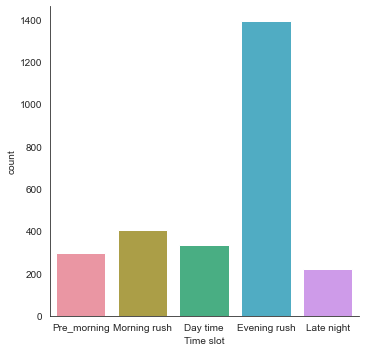

In [345]:
#cancelled trip during time slot

no_cab= uber_data.loc[uber_data['Status']=="No Cars Available"] 
sns.catplot(x="Time slot",data=no_cab,kind="count")
plt.show()

##The unavailability of cars is high during evening rush hours from 5 PM to 10 Pm which is actually a peak time. where people travel most. there is high demand of cars during eveing rush hours.

# Supply and demand for morning rush hours

In [350]:
Demand_mrng_rush= uber_data.loc[(uber_data["Time slot"]=="Morning rush")].shape[0]
Supply_mrng_rush= uber_data.loc[(uber_data["Time slot"]=="Morning rush")&(uber_data["Status"]=="Trip Completed")].shape[0]
 
print("Number of trips in Morning rush           ",Demand_mrng_rush)
print("Number of trips completed in Morning rush ",Supply_mrng_rush)

#to calcuate morning rush demand percentage 

percent_Demand_mrng_rush= 100-(round((Supply_mrng_rush/Demand_mrng_rush)*100))

print("Percentage Demand for Morning rush        ", percent_Demand_mrng_rush,"%")

Number of trips in Morning rush            2103
Number of trips completed in Morning rush  854
Percentage Demand for Morning rush         59 %


# Supply and demand for morning rush hours by location

In [114]:
#Airport supply and demand for morning rush

Airport_Demand_mrng_rush = morning_rush.loc[(morning_rush["Pickup point"]=="Airport")].shape[0]
Airport_Supply_mrng_rush = morning_rush.loc[(morning_rush["Pickup point"]=="Airport") &
                                           (morning_rush["Status"]=="Trip Completed")].shape[0]



#Airport supply and demand for morning rush

City_Demand_mrng_rush = morning_rush.loc[(morning_rush["Pickup point"]=="City")].shape[0]
City_Supply_mrng_rush = morning_rush.loc[(morning_rush["Pickup point"]=="City")&
                                         (morning_rush["Status"]=="Trip Completed")].shape[0]



print("Number of Airport trip in morning rush hours          ", Airpot_Demand_mrng_rush)
print("Number of Airport trip completed in morning rush hours", Airpot_Supply_mrng_rush)

print("Number of City trip in morning rush hours             ", City_Demand_mrng_rush)
print("Number of City trip completed in morning rush hours   ", City_Supply_mrng_rush)



Number of Airport trip in morning rush hours           426
Number of Airport trip completed in morning rush hours 382
Number of City trip in morning rush hours              1677
Number of City trip completed in morning rush hours    472


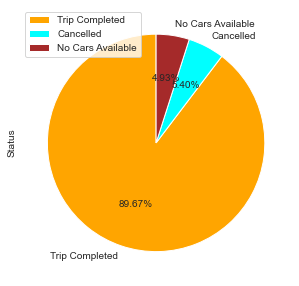

In [299]:
#morning rush  at airport

Airport_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="Airport")]

#converting morning rush into data frame

Airport_mrng_count=pd.DataFrame(Airport_mrng["Status"].value_counts())

#pie chart represting for morning rush airport location 

colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige") 
Airport_mrng_count.plot.pie(y='Status',colors = colors,autopct="%.2f%%",startangle=90,figsize=(5, 5))

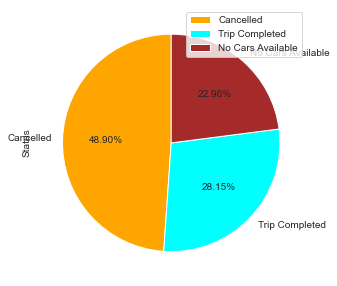

In [300]:
#morning rush  at city

city_mrng= morning_rush.loc[(morning_rush["Pickup point"]=="City")]

#converting morning rush into data frame

city_mrng_count=pd.DataFrame(city_mrng["Status"].value_counts())

#pie chart represting for morning rush airport location 

city_mrng_count.plot.pie(y='Status',colors = colors,autopct="%.2f%%",startangle=90,figsize=(5, 5))

In [346]:

# to calculate percentage demand for Airport in morning rush

percent_airport_Demand_mrng_rush=100- (round((Airport_Supply_mrng_rush/Airport_Demand_mrng_rush)*100))

#to calculate percentge demand for city in morning rush

percent_city_Demand_mrng_rush= 100-(round((City_Supply_mrng_rush/City_Demand_mrng_rush)*100))

print("Demand percentage for airport                         ",percent_airport_Demand_mrng_rush,"%")
print("Demand percentage for city                            ",percent_city_Demand_mrng_rush,"%")


Demand percentage for airport                          10 %
Demand percentage for city                             72 %


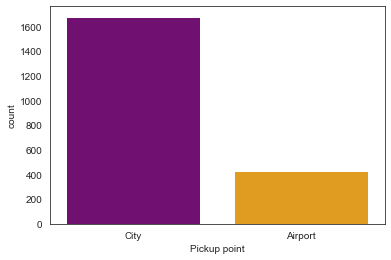

In [59]:
#Demand in morning rush

sns.countplot(x="Pickup point",data=morning_rush)

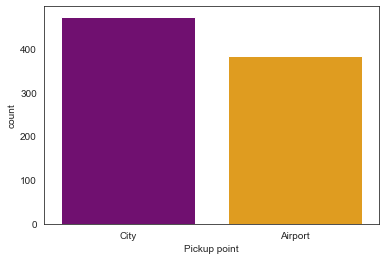

In [60]:
#Supply in morning rush

Supply_mrng_rush = morning_rush.loc[morning_rush['Status']=="Trip Completed"]
sns.countplot(x="Pickup point",data=Supply_mrng_rush)

##### Supply and demand for morning rush hours Inference
the Peak morning hours from 5 AM to 10 AM has 59% of demand over all. since 90% of trips were completed from the rout airport to city at this rush hours there is less demand for the rout airport to city.whereas city to airport trip has higher demand of 75% during moring rush hours. 

# Supply and demand for evening rush hours

In [351]:
Demand_eve_rush= uber_data.loc[(uber_data["Time slot"]=="Evening rush")].shape[0]
Supply_eve_rush= uber_data.loc[(uber_data["Time slot"]=="Evening rush")&(uber_data["Status"]=="Trip Completed")].shape[0]
 
print("Number of trips in Evening rush           ",Demand_eve_rush)
print("Number of trips completed in Evening rush ",Supply_eve_rush)

#to calcuate demand percentage for evening rush

percent_Demand_eve_rush=100-( round((Supply_eve_rush/Demand_eve_rush)*100))

print("Percentage demand for Evening rush        ", percent_Demand_eve_rush,"%")

Number of trips in Evening rush            2342
Number of trips completed in Evening rush  784
Percentage demand for Evening rush         67 %


# Supply and demand for evening rush hours by location

In [120]:
#Airport supply and demand for Evening rush

Airport_Demand_eve_rush = evening_rush.loc[(evening_rush["Pickup point"]=="Airport")].shape[0]
Airport_Supply_eve_rush  = evening_rush.loc[(evening_rush["Pickup point"]=="Airport") &
                                           (evening_rush["Status"]=="Trip Completed")].shape[0]


#Airport supply and demand for Evening rush

City_Demand_eve_rush = evening_rush.loc[(evening_rush["Pickup point"]=="City")].shape[0]
City_Supply_eve_rush = evening_rush.loc[(evening_rush["Pickup point"]=="City")&
                                         (evening_rush["Status"]=="Trip Completed")].shape[0]


print("Number of Airport trip in Evening rush           ", Airport_Demand_eve_rush)
print("Number of Airport trip completed in Evening rush ", Airport_Supply_eve_rush)

print("Number of City trip in Evening rush              ", City_Demand_eve_rush)
print("Number of City trip completed in Evening rush    ", City_Supply_eve_rush)



Number of Airport trip in Evening rush          1800
Number of Airport trip completed in Evening rush 373
Number of City trip in Evening rush              542
Number of City trip completed in Evening rush     411


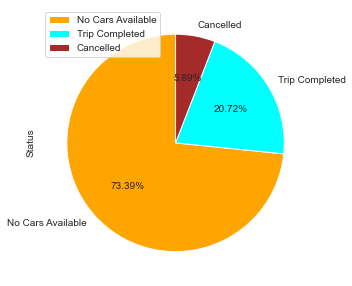

In [298]:
#evening rush  at airport

Airport_eve= evening_rush.loc[(evening_rush["Pickup point"]=="Airport")]

#converting evening rush into data frame

Airport_eve_count=pd.DataFrame(Airport_eve["Status"].value_counts())

#pie chart represting for evening rush airport location 

colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige") 
Airport_eve_count.plot.pie(y='Status',colors = colors,autopct="%.2f%%",startangle=90,figsize=(5, 5))

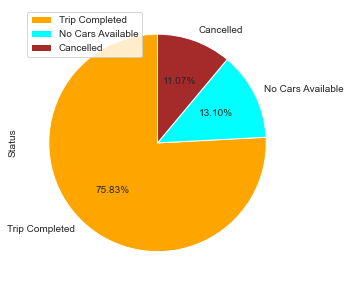

In [348]:
#evening rush  at city

city_eve= evening_rush.loc[(evening_rush["Pickup point"]=="City")]

#converting evening rush into data frame

city_eve_count=pd.DataFrame(city_eve["Status"].value_counts())

#pie chart represting for evening rush city location 

city_eve_count.plot.pie(y='Status',colors = colors,autopct="%.2f%%", startangle =90,figsize=(5, 5))


In [347]:
# to calculate percentage demand for Airport in Evening rush

percent_airport_Demand_eve_rush= 100-(round((Airport_Supply_eve_rush/Airport_Demand_eve_rush)*100))

#to calculate percentge demand for city in Evening rush
percent_city_Demand_eve_rush= 100-(round((City_Supply_eve_rush/City_Demand_eve_rush)*100))

print("Percentage Demand for airport                         ",percent_airport_Demand_eve_rush,"%")
print("Percentage Demand for city                            ",percent_city_Demand_eve_rush,"%")



Percentage Demand for airport                          79 %
Percentage Demand for city                             24 %


# Inference for Supply and demand evening rush hours 
There is 79% of demand for airport to city trips during evening peak hours from 5 PM to 10 PM. only 21% of trip has been completed and 73% of trip has no car availability. cancellation request is all less. The demand percentage is low for city to airport trips. 

# Supply and demand for Day time

In [353]:
Demand_day_time= uber_data.loc[(uber_data["Time slot"]=="Day time")].shape[0]
Supply_day_time= uber_data.loc[(uber_data["Time slot"]=="Day time")&(uber_data["Status"]=="Trip Completed")].shape[0]
 
print("Number of trips during Pre Day time          ",Demand_day_time)
print("Number of trips completed during Day time    ",Supply_day_time)

#to calcuate day time demand percentage 

percent_Demand_day_time= 100-(round((Supply_day_time/Demand_day_time)*100))

print("demand percentage for Day time               ", percent_Demand_day_time,"%")

Number of trips during Pre Day time           1224
Number of trips completed during Day time     722
demand percentage for Day time                41 %


# Supply and demand for Day time by location

In [354]:
day_time= uber_data.loc[uber_data["Time slot"]=="Day time"]
#Airport supply and demand for day time

Airport_Demand_day_time = day_time.loc[(day_time["Pickup point"]=="Airport")].shape[0]
Airport_Supply_day_time  = day_time.loc[(day_time["Pickup point"]=="Airport") &
                                           (day_time["Status"]=="Trip Completed")].shape[0]


#Airport supply and demand for day time

City_Demand_day_time = day_time.loc[(day_time["Pickup point"]=="City")].shape[0]
City_Supply_day_time = day_time.loc[(day_time["Pickup point"]=="City")&
                                         (day_time["Status"]=="Trip Completed")].shape[0]


print("Number of Airport trip in Day time          ", Airport_Demand_day_time)
print("Number of Airport trip completed in Day time", Airport_Supply_day_time)

print("Number of City trip in Day time             ", City_Demand_day_time)
print("Number of City trip completed in Day time   ", City_Supply_day_time)



Number of Airport trip in Day time           478
Number of Airport trip completed in Day time 327
Number of City trip in Day time              746
Number of City trip completed in Day time    395


In [355]:
# to calculate percentage demand for Airport in day time

percent_airport_Demand_day_time= 100-(round((Airport_Supply_day_time/Airport_Demand_day_time)*100))

#to calculate percentge demand for city in day time

percent_city_Demand_day_time= 100-(round((City_Supply_day_time/City_Demand_day_time)*100))

print("Percentage Demand for airport                         ",percent_airport_Demand_day_time,"%")
print("Percentage Demand for city                            ",percent_city_Demand_day_time,"%")




Percentage Demand for airport                          32 %
Percentage Demand for city                             47 %


# Supply and demand for Pre morning

In [356]:
Demand_pre_mrng= uber_data.loc[(uber_data["Time slot"]=="Pre_morning")].shape[0]
Supply_pre_mrng= uber_data.loc[(uber_data["Time slot"]=="Pre_morning")&(uber_data["Status"]=="Trip Completed")].shape[0]
 
print("Number of trips during Pre morining hours          ",Demand_pre_mrng)
print("Number of trips completed during pre morning hours ",Supply_pre_mrng)

#to calcuate day time demand percentage 

percent_Demand_pre_mrng= 100-(round((Supply_pre_mrng/Demand_pre_mrng)*100))

print("demand percentage for Pre morning                  ", percent_Demand_pre_mrng,"%")


Number of trips during Pre morining hours           578
Number of trips completed during pre morning hours  214
demand percentage for Pre morning                   63 %


# Supply and demand for Pre morning by location

In [357]:
pre_mrng= uber_data.loc[uber_data["Time slot"]=="Pre_morning"]

#Airport supply and demand for morning rush

Airport_Demand_pre_mrng = pre_mrng.loc[(pre_mrng["Pickup point"]=="Airport")].shape[0]
Airport_Supply_pre_mrng  = pre_mrng.loc[(pre_mrng["Pickup point"]=="Airport") &
                                           (pre_mrng["Status"]=="Trip Completed")].shape[0]


#Airport supply and demand for pre morning

City_Demand_pre_mrng = day_time.loc[(day_time["Pickup point"]=="City")].shape[0]
City_Supply_pre_mrng = day_time.loc[(day_time["Pickup point"]=="City")&
                                         (day_time["Status"]=="Trip Completed")].shape[0]


print("Number of Airport trip in Pre morning          ", Airport_Demand_pre_mrng)
print("Number of Airport trip completed in Pre morning", Airport_Supply_pre_mrng)

print("Number of City trip in Pre morning             ", City_Demand_pre_mrng)
print("Number of City trip completed in Pre morning   ", City_Supply_pre_mrng)



Number of Airport trip in Pre morning           253
Number of Airport trip completed in Pre morning 103
Number of City trip in Pre morning              746
Number of City trip completed in Pre morning    395


In [358]:
# to calculate percentage demand for Airport in pre_morning

percent_airport_Demand_pre_mrng= 100-(round((Airpot_Supply_pre_mrng/Airport_Demand_pre_mrng)*100))

#to calculate percentge demand for city in Pre morning

percent_city_Demand_pre_mrng= 100-(round((City_Supply_pre_mrng/City_Demand_pre_mrng)*100))

print("Percentage Demand for airport                         ",percent_airport_Demand_pre_mrng,"%")
print("Percentage Demand for city                            ",percent_city_Demand_pre_mrng,"%")


Percentage Demand for airport                          59 %
Percentage Demand for city                             47 %


# Supply and demand for Late night

In [359]:
Demand_late_night= uber_data.loc[(uber_data["Time slot"]=="Late night")].shape[0]
Supply_late_night= uber_data.loc[(uber_data["Time slot"]=="Late night")&(uber_data["Status"]=="Trip Completed")].shape[0]
 
print("Number of trips in day time           ",Demand_late_night)
print("Number of trips completed in day time ",Supply_late_night)

#to calcuate Late night demand percentage 

percent_Demand_late_night= 100-(round((Supply_late_night/Demand_late_night)*100))

print("demand percentage for late night       ", percent_Demand_late_night,"%")


Number of trips in day time            498
Number of trips completed in day time  257
demand percentage for late night        48 %


# Supply and demand for Late night by location

In [349]:
late_night= uber_data.loc[uber_data["Time slot"]=="Late night"]

#Airport supply and demand for Late night

Airport_Demand_late_night = late_night.loc[(late_night["Pickup point"]=="Airport")].shape[0]
Airport_Supply_late_night  = late_night.loc[(late_night["Pickup point"]=="Airport") &
                                           (late_night["Status"]=="Trip Completed")].shape[0]



#Airport supply and demand for late night

City_Demand_late_night = late_night.loc[(late_night["Pickup point"]=="City")].shape[0]
City_Supply_late_night = late_night.loc[(late_night["Pickup point"]=="City")&
                                         (late_night["Status"]=="Trip Completed")].shape[0]



print("Number of Airport trip in Late night          ", Airport_Demand_late_night)
print("Number of Airport trip completed in Late night", Airport_Supply_late_night)

print("Number of City trip in Late night             ", City_Demand_late_night)
print("Number of City trip completed in Late night   ", City_Supply_late_night)



Number of Airport trip in Late night           281
Number of Airport trip completed in Late night 142
Number of City trip in Late night              217
Number of City trip completed in Late night    115


In [360]:
# to calculate percentage demand for Airport in late night

percent_airport_Demand_late_night= 100-(round((Airport_Supply_late_night/Airport_Demand_late_night)*100))

#to calculate percentge demand for city in late night

percent_city_Demand_late_night= 100-(round((City_Supply_late_night/City_Demand_late_night)*100))

print("Percentage Demand for airport                         ",percent_airport_Demand_late_night,"%")
print("Percentage Demand for city                            ",percent_city_Demand_late_night,"%")

Percentage Demand for airport                          49 %
Percentage Demand for city                             47 %


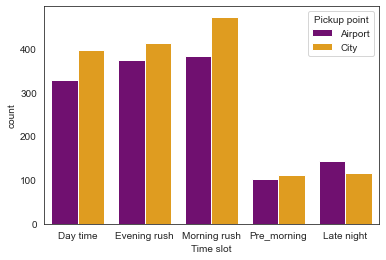

In [85]:
#supply for time slots 

trip_completed= uber_data.loc[uber_data['Status']=="Trip Completed"]
sns.countplot(x="Time slot",data=trip_completed,hue="Pickup point")

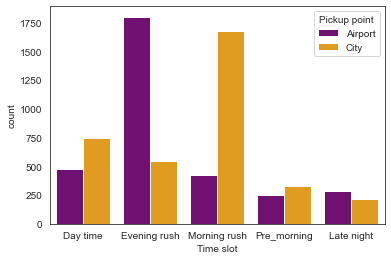

In [86]:
#demand for each time slot
sns.countplot(x="Time slot",data=uber_data,hue="Pickup point")

In [362]:
#percentage demand for each time slot

percentage = pd.DataFrame({'Percentage Demand': [percent_Demand_pre_mrng, percent_Demand_mrng_rush ,percent_Demand_day_time, 
                                                 percent_Demand_eve_rush,percent_Demand_late_night]},
                           index=["Pre_morning","Morning rush","Day time","Evening rush","Late night"])
percentage

,Percentage Demand
Pre_morning,63
Morning rush,59
Day time,41
Evening rush,67
Late night,48


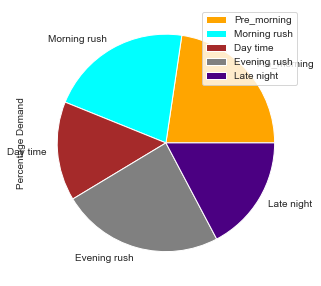

In [363]:
##percentage demand for each time slot-pie chart

colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige") 
percentage.plot.pie(y='Percentage Demand',colors = colors,figsize=(5, 5))

In [365]:
# percentage demand for Airport and City in pre_morning

frac_airport_Demand_pre_mrng= 100-(round((Airpot_Supply_pre_mrng/Airport_Demand_pre_mrng)*100,2))
frac_city_Demand_pre_mrng=100-( round((City_Supply_pre_mrng/City_Demand_pre_mrng)*100,2))


# to calculate percentage demand for Airport and city in morning rush

frac_airport_Demand_mrng_rush= 100-(round((Airport_Supply_mrng_rush/Airport_Demand_mrng_rush)*100,2))
frac_city_Demand_mrng_rush= 100-(round((City_Supply_mrng_rush/City_Demand_mrng_rush)*100,2))

# to calculate percentage demand for Airport and City in day time

frac_airport_Demand_day_time=100-(round((Airport_Supply_day_time/Airport_Demand_day_time)*100,2))
frac_city_Demand_day_time= 100-(round((City_Supply_day_time/City_Demand_day_time)*100,2))

# to calculate percentage demand for Airport and city in Evening rush

frac_airport_Demand_eve_rush=100-(round(( Airport_Supply_eve_rush/Airport_Demand_eve_rush)*100,2))
frac_city_Demand_eve_rush= 100-(round((City_Supply_eve_rush/City_Demand_eve_rush)*100,2))

# to calculate percentage demand for Airport and city in late night

frac_airport_Demand_late_night=100-(round(( Airport_Supply_late_night/Airport_Demand_late_night)*100,2))
frac_city_Demand_late_night= 100-(round((City_Supply_late_night/City_Demand_late_night)*100,2))


demand_per= pd.DataFrame({"time_slot":["Pre_morning","Morning rush","Day time","Evening rush","Late night"],
                       'Airport percent': [frac_airport_Demand_pre_mrng,frac_airport_Demand_mrng_rush,
                                       frac_airport_Demand_day_time,frac_airport_Demand_eve_rush,
                                       frac_airport_Demand_late_night],
                       'City percent': [frac_city_Demand_pre_mrng,frac_city_Demand_mrng_rush,
                                       frac_city_Demand_day_time,frac_city_Demand_eve_rush,
                                        frac_city_Demand_late_night]})
                       

demand_per

,time_slot,Airport percent,City percent
0,Pre_morning,59.29,47.05
1,Morning rush,10.33,71.85
2,Day time,31.59,47.05
3,Evening rush,79.28,24.17
4,Late night,49.47,47.00


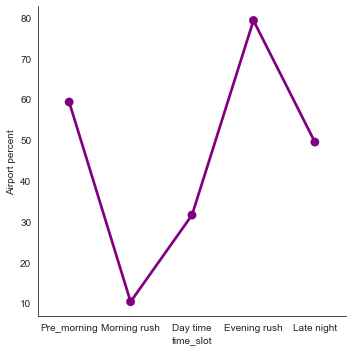

In [366]:
#demand from Airport to city during various time slot

sns.catplot(x="time_slot",y="Airport percent",data=demand_per,kind="point")

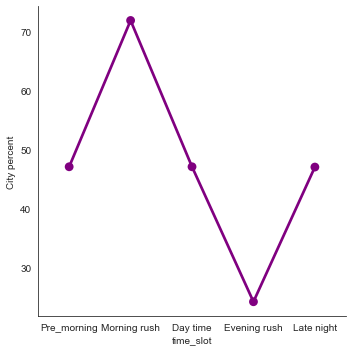

In [367]:
#demand from city to airport during various time slot

sns.catplot(x="time_slot",y="City percent",data=demand_per,kind="point")

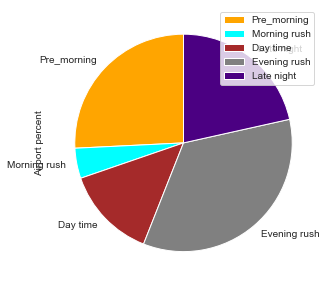

In [378]:
#demand from Airport to city during various time slot - pie chart 

demand_per.plot.pie(y='Airport percent',labels=demand_per["time_slot"],colors = colors,figsize=(5, 5),startangle=90)

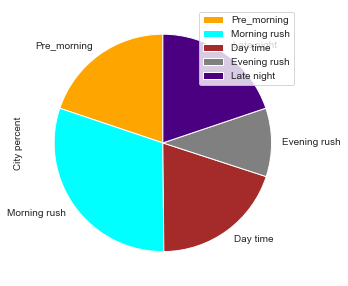

In [379]:
#demand from city to airport during various time slot - pie chart

plot = demand_per.plot.pie(y='City percent',labels=demand_per["time_slot"],colors = colors,figsize=(5, 5),startangle=90)

# Supply and Demand for location for each time slot
 

1)From overall analysis, the demand for airport to city trip is highest at eveing rush hours from 5 PM to 10 PM and demand is high for city to airport trip during Morning rush hours and vice versa.

2)The damand for airport to city trip is high until 5 AM. city to airport demand is also as high as airport to city until 5 AM

3)The car unavailability issue during evening rush hours increses the demand, particularly from airport to city rout

4)The request for cancellation is high during morning hours from 5 AM to 10 AM

# Recomandations 

1)Since there is great demand during morning and evening rush hours, it is recommend to increase the drivers by providing extra allowance or higher percentage of commission during evening and morning peak hours.

2)In order to avoid trip cancellation by the customers, the drivers has to be on time at the pickup point. So by awarding Extra bonus amount for drivers achiving more target and being at pickup point on time cancellation can be reduced.



